In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
dataset = pd.read_csv("dataset/Country-data.csv")

In [26]:
X = dataset.drop(columns = ['country'])
X.sample(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
106,101.0,31.5,5.21,46.2,918,7.640,54.5,5.56,419
76,18.1,31.3,4.81,49.6,8000,9.810,74.7,2.17,4680
126,63.6,12.0,10.50,30.0,1350,2.610,64.6,4.51,563
17,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758
149,62.6,2.2,9.12,27.8,1850,26.500,71.1,6.23,3600
32,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
128,15.7,49.6,4.29,33.0,45400,17.200,75.1,2.96,19300
34,15.7,26.3,5.07,22.6,9530,6.940,74.6,1.59,4560
147,71.9,18.7,6.01,29.1,2090,9.250,59.3,5.43,702


## Data preprocessing

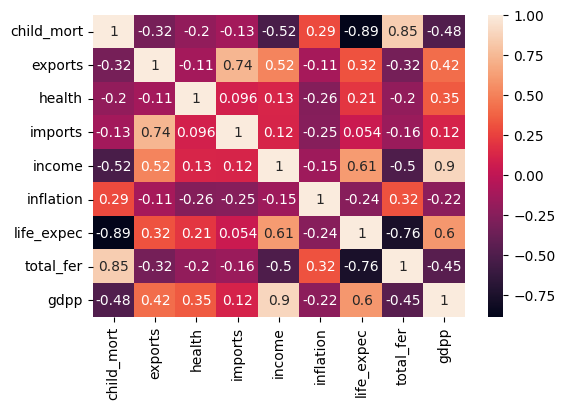

In [27]:
import seaborn as sns
plt.figure(dpi=100)
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [29]:
# removing 'imports' feature
X = X.drop(columns = ['imports'])

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [7]:
X

,child_mort,exports,health,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## KMeans Clustering

### Elbow Method

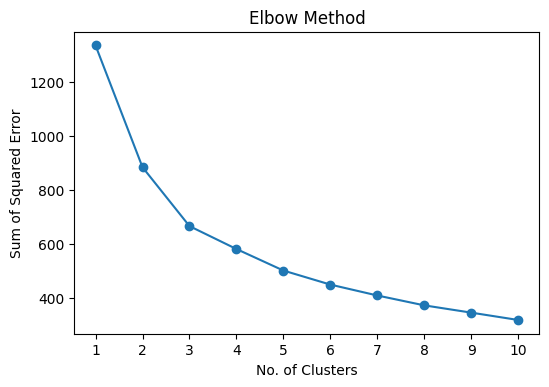

In [24]:
from sklearn.cluster import KMeans
plt.figure(dpi = 100)
k_list = range(1,11)
ssd = []
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(X)
    ssd.append(km.inertia_)

plt.plot(k_list, ssd, marker = 'o')
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Sum of Squared Error")
plt.xticks(k_list)
plt.show()

### Modeling using k = 4

In [9]:
# n_clusters = 4
km_model = KMeans(n_clusters=4)
clusters = km_model.fit_predict(X)

In [10]:
clusters

array([3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3,
       1, 0, 1, 3, 3, 1, 3, 2, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 3, 1,
       3, 1, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 1, 3, 3, 0, 1, 3, 1, 1, 3,
       3, 1, 1, 0, 1, 3, 3, 1, 1, 3, 0, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       2, 2, 3, 3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 0, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 0, 2, 2, 3, 3, 2, 2, 1, 1, 3, 1, 2, 2, 1, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 1, 0, 2, 2, 1, 1, 1, 1, 1, 3, 3])

### Silhouette Analysis

In [11]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, clusters)
print(sil_score)

0.3188060193762948


### Visualizing
I used 'life_expec', 'health', 'child_mort' features to visualize the dataset together with their related clusters.

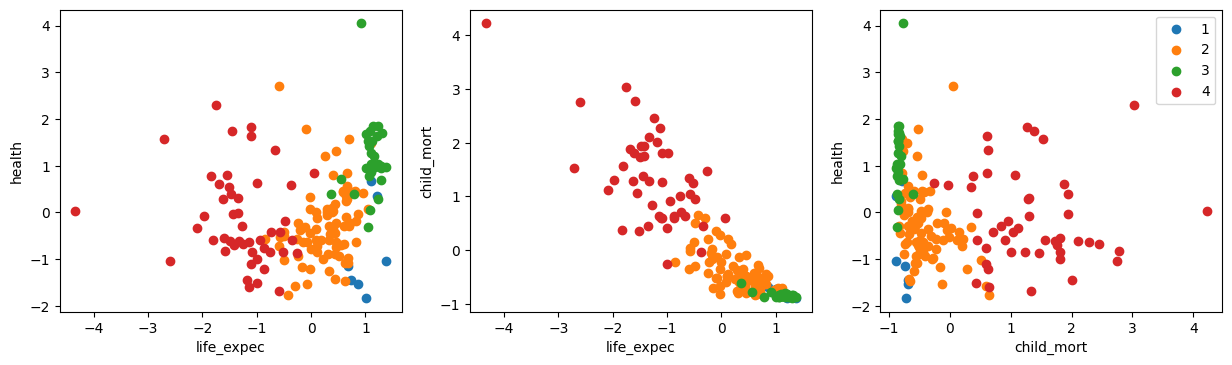

In [31]:
# life_expec, health, child_mort
axs = plt.figure(figsize=(15,4), dpi=100).subplots(1,3)
for c in range(4):
    axs[0].scatter(X['life_expec'].loc[clusters == c], X['health'].loc[clusters == c], label="{0}".format(c+1))
    axs[1].scatter(X['life_expec'].loc[clusters == c], X['child_mort'].loc[clusters == c], label="{0}".format(c+1))
    axs[2].scatter(X['child_mort'].loc[clusters == c], X['health'].loc[clusters == c], label="{0}".format(c+1))

axs[0].set(xlabel="life_expec", ylabel="health")
axs[1].set(xlabel="life_expec", ylabel="child_mort")
axs[2].set(xlabel="child_mort", ylabel="health")    
plt.legend()
plt.show()    

## PCA

In [33]:
from sklearn.preprocessing import StandardScaler
dataset_pca = dataset.drop(columns=['country'])
sc = StandardScaler()
dataset_pca = pd.DataFrame(sc.fit_transform(dataset_pca), columns = dataset_pca.columns)
dataset_pca.sample(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
129,0.709559,-0.593088,-0.422000,-0.273034,-0.778589,-0.562845,-0.739377,1.399340,-0.654718
123,-0.727966,0.775381,-1.827827,-0.956632,5.611542,-0.076082,1.008775,-0.581700,3.137608
88,1.269149,-0.805310,1.820021,1.893764,-0.855591,-0.219360,-1.100286,1.372838,-0.691547
43,-0.867242,0.910764,0.388633,0.663288,0.580393,-0.874070,0.783207,-0.952731,0.374080
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
107,0.649869,-1.500192,-1.769403,-1.939940,-0.698465,-0.070389,-0.423582,-0.356431,-0.655375
49,1.808842,1.635248,-0.852877,0.497568,0.861347,1.624268,-1.089007,1.498724,0.226327
67,-0.802578,1.488888,0.187801,1.226739,0.268223,-0.517300,0.444855,-1.124995,0.007434
15,-0.839884,1.291301,1.418356,1.152164,1.246357,-0.559999,1.065167,-0.720836,1.720274
14,-0.815013,0.376549,-0.440257,0.729576,-0.049151,0.694389,-0.017559,-0.965982,-0.379460


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=dataset_pca.shape[1], svd_solver='full')
pca.fit_transform(dataset_pca)

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

### Percentage of Variance Explained

<BarContainer object of 9 artists>

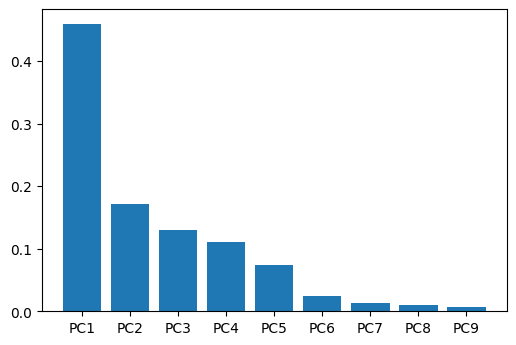

In [35]:
plt.figure(dpi=100)
plt.bar(["PC{0}".format(i+1) for i in range(9)], pca.explained_variance_ratio_)

In [36]:
# The best number of components is 5.
pca = PCA(n_components=5, svd_solver='full')
dataset_after_pca = pd.DataFrame(pca.fit_transform(dataset_pca), columns=["PC{0}".format(i+1) for i in range(5)])

In [17]:
dataset_after_pca

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


### KMeans clustering after PCA

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
clusters_pca = kmeans.fit_predict(dataset_after_pca)

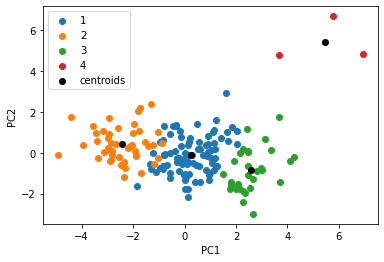

In [38]:
for cluster in range(4):
    plt.scatter(dataset_after_pca['PC1'].loc[clusters_pca==cluster], dataset_after_pca['PC2'].loc[clusters_pca==cluster], label="{0}".format(cluster + 1))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='k', label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

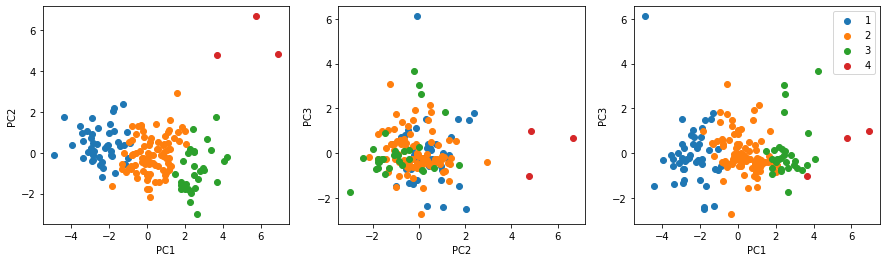

In [20]:
axs = plt.figure(figsize=(15,4)).subplots(1,3)
for c in range(4):
    axs[0].scatter(dataset_after_pca['PC1'].loc[clusters_pca == c], dataset_after_pca['PC2'].loc[clusters_pca == c], label="{0}".format(c+1))
    axs[1].scatter(dataset_after_pca['PC2'].loc[clusters_pca == c], dataset_after_pca['PC3'].loc[clusters_pca == c], label="{0}".format(c+1))
    axs[2].scatter(dataset_after_pca['PC1'].loc[clusters_pca == c], dataset_after_pca['PC3'].loc[clusters_pca == c], label="{0}".format(c+1))

axs[0].set(xlabel="PC1", ylabel="PC2")
axs[1].set(xlabel="PC2", ylabel="PC3")
axs[2].set(xlabel="PC1", ylabel="PC3")    
plt.legend()
plt.show()    